<a href="https://colab.research.google.com/github/first-order-coder/30_day_Python/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

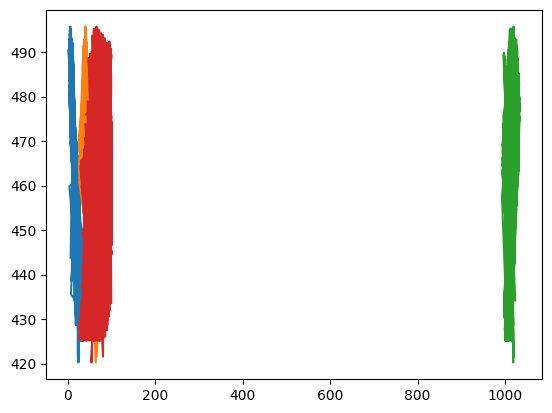

In [ ]:
df = pd.read_csv('Data.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values.reshape(-1, 1)

plt.plot(X, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [ ]:
print(X_test.size)
# plt.scatter(X_test, y_test, color='red')
# plt.show()

7656


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1914, 4)
(1914, 1)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train) #new feature X_poly which contains original feature + poly features up to degree 4
regressor = LinearRegression()
regressor.fit(X_poly, y_train)


so X_poly is the new set of features with over 70 features in total. So then we take X_poly and we train it on linearRegression model to find the most suitable coeffeicents of Regression euqation that best fit the poly data. So now regressor is trained and it knows the coefficetns for different features.

Then we use it to predict the target variables.

In [ ]:
# y_predict = regressor.predict(X_test) this will popup an error messageValueError: X has 4 features, but LinearRegression is expecting 70 features as input.
y_predict = regressor.predict(poly_reg.transform(X_test)) # we are not fitting the model !!!!! we just transforming it according to previous trained model.
print(y_predict)

[[456.08167381]
 [462.80304251]
 [438.32645738]
 ...
 [476.31565646]
 [432.67953928]
 [464.55556308]]


Then we do the accuracy test


In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predict.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1))

[[456.08 458.96]
 [462.8  463.29]
 [438.33 435.27]
 ...
 [476.32 476.22]
 [432.68 440.29]
 [464.56 467.92]]


Evaluating Model Performance by using r2_score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_predict, y_test)

0.9406519757671481

In [ ]:
print(X_poly)
# print(type(X_poly))
# print(X_poly.shape)
# print(y.shape)

[[1.00e+00 6.61e+00 3.89e+01 ... 8.79e+09 7.99e+08 7.26e+07]
 [1.00e+00 2.27e+01 6.56e+01 ... 5.12e+09 3.56e+08 2.47e+07]
 [1.00e+00 1.01e+01 3.96e+01 ... 5.11e+09 3.53e+08 2.43e+07]
 ...
 [1.00e+00 1.86e+01 3.95e+01 ... 4.79e+09 3.26e+08 2.22e+07]
 [1.00e+00 2.30e+01 4.50e+01 ... 2.65e+09 1.33e+08 6.66e+06]
 [1.00e+00 2.05e+01 4.97e+01 ... 5.11e+09 3.58e+08 2.51e+07]]


In [ ]:
x_vals = np.arange(min)
plt.plot(X_train, regressor.predict(X_poly), color= 'blue')
# plt.scatter(X_test, y_test, color='red')
plt.show()